http://www.sthda.com/english/articles/32-r-graphics-essentials/128-plot-time-series-data-using-ggplot/

https://data.gov.ie/dataset/dublin-airport-daily-data

This table contains daily elements measured at our synoptic station in Dublin_Airport, Co Dublin. The file is updated monthly.


 ### Daily Elements:
 

ID	|    ELEMENT   |   Unit      
:---|:---|:---
rain	|        Precipitation Amount      |  mm|
maxtp     |  	Maximum Air Temperature	   |   °C	|  
mintp      |   	Minimum  Air Temperature	|   °C|
gmin		|09utc Grass Minimum Temperature	| 						  °C|
soil	|	Mean 10cm Soil Temperature 			| 			          °C	|
wdsp	|	Mean Wind Speed				    |                               	  knot|
hm	|	Highest 10 minute mean wind speed			| 		          knot |                
ddhm	|	Mean wind direction over 10 minutes at time of highest mean		 |         degree|
hg		| Highest Gust			| 					          knot|
cbl		| Mean CBL Pressure 							|          hpa |
sun		| Sunshine duration							    |      hours|
g_rad  |   	Global Radiation 							|          j/cm sq.| 
pe		| Potential Evapotranspiration - calculated using Penman-Monteith Equation |	  mm|
evap	| 	Evaporation - calculated using Penman formula 				  |        mm|
smd_wd	| 	Soil Moisture Deficits for well drained soils         |	         		  mm|
smd_md	| 	Soil Moisture Deficits for moderately drained soils   |	calculated values	  mm|
smd_pd	| 	Soil Moisture Deficits for poorly drained soils	      | 			  mm
dos		| Dept of Snow								          cm
ind	|	Indicator| (i)

In [1]:
library(tidyverse)#  This library includes ggplot and a few others.
library(sqldf)
library(ggstream)

datasetname = "https://cli.fusio.net/cli/climate_data/webdata/dly532.csv"
# dfdub<-read.csv(datasetname)

# str(dfdub)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: gsubfn

Loading required package: proto

Loading required package: RSQLite



What happened?  Let's open the file in Excel...

It turns out that the top 25 lines are comments.  We'll skip them.

In [2]:
dfdub<-read.csv(datasetname,skip=25)

str(dfdub)

'data.frame':	29251 obs. of  26 variables:
 $ date  : chr  "01-jan-1942" "02-jan-1942" "03-jan-1942" "04-jan-1942" ...
 $ ind   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ maxtp : num  9.7 9.9 11.2 9.2 3.5 5.1 7.1 7.1 4.5 5.3 ...
 $ ind.1 : int  0 0 0 0 1 0 0 0 0 1 ...
 $ mintp : num  6.8 7.9 8.9 2.7 -0.8 0.7 0.5 1.4 0.7 -2.8 ...
 $ igmin : int  0 0 0 0 0 1 1 0 0 1 ...
 $ gmin  : num  4.7 6.7 7.2 3.4 0 -3.7 -1 0.2 0.9 -4.1 ...
 $ ind.2 : int  2 0 0 0 0 2 3 3 0 3 ...
 $ rain  : num  0 0.1 1.5 3.5 0.6 0 0 0 0.2 0 ...
 $ cbl   : num  1020 1016 1007 1002 1013 ...
 $ wdsp  : num  17.2 15.2 14 17 13 9.7 10.3 9.3 11.8 4 ...
 $ ind.3 : int  1 1 1 1 1 1 1 1 1 1 ...
 $ hm    : int  NA NA NA NA NA NA NA NA NA NA ...
 $ ind.4 : int  1 1 1 1 1 1 1 1 1 1 ...
 $ ddhm  : int  NA NA NA NA NA NA NA NA NA NA ...
 $ ind.5 : int  1 1 1 1 1 1 1 1 1 1 ...
 $ hg    : int  NA NA NA NA NA NA NA NA NA NA ...
 $ sun   : num  0 0 0.1 0.6 3.4 0.1 4 3.7 0.6 5 ...
 $ dos   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ g_rad : int  NA NA N

In [3]:
head(dfdub)

,date,ind,maxtp,ind.1,mintp,igmin,gmin,ind.2,rain,cbl,⋯,hg,sun,dos,g_rad,soil,pe,evap,smd_wd,smd_md,smd_pd
,<chr>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,⋯,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,01-jan-1942,0,9.7,0,6.8,0,4.7,2,0.0,1020.3,⋯,NA,0.0,0,NA,NA,1.1,1.4,NA,NA,NA
2,02-jan-1942,0,9.9,0,7.9,0,6.7,0,0.1,1016.2,⋯,NA,0.0,0,NA,NA,0.7,0.9,NA,NA,NA
3,03-jan-1942,0,11.2,0,8.9,0,7.2,0,1.5,1006.8,⋯,NA,0.1,0,NA,NA,0.5,0.6,NA,NA,NA
4,04-jan-1942,0,9.2,0,2.7,0,3.4,0,3.5,1001.5,⋯,NA,0.6,0,NA,NA,0.6,0.7,NA,NA,NA
5,05-jan-1942,0,3.5,1,-0.8,0,0.0,0,0.6,1013.4,⋯,NA,3.4,0,NA,NA,0.6,0.7,NA,NA,NA
6,06-jan-1942,0,5.1,0,0.7,1,-3.7,2,0.0,1021.1,⋯,NA,0.1,0,NA,NA,0.4,0.5,NA,NA,NA


Have a quick look at the data.  What about NAs?  What is ind.1 and what are its values?  How many rows are there?

In [4]:
unique(dfdub$hg)

[1] NA 40 14 35 46 31 41 38 22 13 27 24 25  9 32 33 26 30 20 43 37 29 28 23 36
[26] 17 16 19 18  7 34 15 10 39 52 47 21 11 49 12 44 42 54 45 53 50 51  5  8 59
[51] 48 55 62 58  6 68 56 57 60 61 73 67 63 69 64 71 66 70 75 65  4  3 76 80

In [5]:
sum(is.na(dfdub$hg))

[1] 887

In [6]:
unique(dfdub$ind.1)

[1] 0 1 2

In [7]:
nrow(dfdub)

[1] 29251

Often we're only interested in some of the attributes:

In [8]:
colnames(dfdub)

[1] "date"   "ind"    "maxtp"  "ind.1"  "mintp"  "igmin"  "gmin"   "ind.2" 
 [9] "rain"   "cbl"    "wdsp"   "ind.3"  "hm"     "ind.4"  "ddhm"   "ind.5" 
[17] "hg"     "sun"    "dos"    "g_rad"  "soil"   "pe"     "evap"   "smd_wd"
[25] "smd_md" "smd_pd"

In [9]:
timedf<-sqldf("select date, maxtp, mintp, rain, ddhm, sun from dfdub")
str(timedf)

'data.frame':	29251 obs. of  6 variables:
 $ date : chr  "01-jan-1942" "02-jan-1942" "03-jan-1942" "04-jan-1942" ...
 $ maxtp: num  9.7 9.9 11.2 9.2 3.5 5.1 7.1 7.1 4.5 5.3 ...
 $ mintp: num  6.8 7.9 8.9 2.7 -0.8 0.7 0.5 1.4 0.7 -2.8 ...
 $ rain : num  0 0.1 1.5 3.5 0.6 0 0 0 0.2 0 ...
 $ ddhm : int  NA NA NA NA NA NA NA NA NA NA ...
 $ sun  : num  0 0 0.1 0.6 3.4 0.1 4 3.7 0.6 5 ...


In [10]:
unique(dfdub$ddhm)
sum(is.na(dfdub$ddhm))

[1]  NA 310 140 260 270 290 280 330 210 110  10  80  20  40 360 230 300 150 120
[20] 320 130 340 190 220 170 240 250 100  30  60  70  50  90 160 200 350 180   0

[1] 899

In [11]:
sqldf("select * from timedf where ddhm is null")

date,maxtp,mintp,rain,ddhm,sun
<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
01-jan-1942,9.7,6.8,0.0,NA,0.0
02-jan-1942,9.9,7.9,0.1,NA,0.0
03-jan-1942,11.2,8.9,1.5,NA,0.1
04-jan-1942,9.2,2.7,3.5,NA,0.6
05-jan-1942,3.5,-0.8,0.6,NA,3.4
06-jan-1942,5.1,0.7,0.0,NA,0.1
07-jan-1942,7.1,0.5,0.0,NA,4.0
08-jan-1942,7.1,1.4,0.0,NA,3.7
09-jan-1942,4.5,0.7,0.2,NA,0.6


It looks like most of the NAs come from before 1948, so let's just work from 1950.

Now we have to deal with dates.  SQLDF doesn't do a good job...

In [12]:
timedf = sqldf("Select * from timedf where date>='01-jan-1950'")

We need to convert the time into ISO-8601, the American standard.  Use posixct
https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/as.POSIX*

In [13]:
timedf['ISODate']= timedf['date']
timedf$ISODate= 
as.POSIXct(
    strptime(
        timedf$ISODate, 
        format = "%d-%b-%Y"))#Note for month in mmm format, %b is the format.

In [14]:
head(timedf)

,date,maxtp,mintp,rain,ddhm,sun,ISODate
,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dttm>
1,02-jan-1942,9.9,7.9,0.1,NA,0.0,1942-01-02
2,03-jan-1942,11.2,8.9,1.5,NA,0.1,1942-01-03
3,04-jan-1942,9.2,2.7,3.5,NA,0.6,1942-01-04
4,05-jan-1942,3.5,-0.8,0.6,NA,3.4,1942-01-05
5,06-jan-1942,5.1,0.7,0.0,NA,0.1,1942-01-06
6,07-jan-1942,7.1,0.5,0.0,NA,4.0,1942-01-07


In [15]:
timedf['month']=x_month <- format(timedf$ISODate, "%b")  #Note %m gives month number
timedf['year']=x_month <- as.numeric(format(timedf$ISODate, "%Y") ) #note %y gives 2-digit year
str(timedf)

'data.frame':	28923 obs. of  9 variables:
 $ date   : chr  "02-jan-1942" "03-jan-1942" "04-jan-1942" "05-jan-1942" ...
 $ maxtp  : num  9.9 11.2 9.2 3.5 5.1 7.1 7.1 4.5 5.3 4 ...
 $ mintp  : num  7.9 8.9 2.7 -0.8 0.7 0.5 1.4 0.7 -2.8 -2.6 ...
 $ rain   : num  0.1 1.5 3.5 0.6 0 0 0 0.2 0 1.1 ...
 $ ddhm   : int  NA NA NA NA NA NA NA NA NA NA ...
 $ sun    : num  0 0.1 0.6 3.4 0.1 4 3.7 0.6 5 1.6 ...
 $ ISODate: POSIXct, format: "1942-01-02" "1942-01-03" ...
 $ month  : chr  "Jan" "Jan" "Jan" "Jan" ...
 $ year   : num  1942 1942 1942 1942 1942 ...


In [16]:
head(timedf)

,date,maxtp,mintp,rain,ddhm,sun,ISODate,month,year
,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dttm>,<chr>,<dbl>
1,02-jan-1942,9.9,7.9,0.1,NA,0.0,1942-01-02,Jan,1942
2,03-jan-1942,11.2,8.9,1.5,NA,0.1,1942-01-03,Jan,1942
3,04-jan-1942,9.2,2.7,3.5,NA,0.6,1942-01-04,Jan,1942
4,05-jan-1942,3.5,-0.8,0.6,NA,3.4,1942-01-05,Jan,1942
5,06-jan-1942,5.1,0.7,0.0,NA,0.1,1942-01-06,Jan,1942
6,07-jan-1942,7.1,0.5,0.0,NA,4.0,1942-01-07,Jan,1942


Now we can do some subsetting - let's check first to see if the date comparison is working, using the which function.

https://www.journaldev.com/45274/which-function-in-r

In [17]:
timedf[which(timedf$ISODate<as.Date('1942-01-06')),]

,date,maxtp,mintp,rain,ddhm,sun,ISODate,month,year
,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dttm>,<chr>,<dbl>
1,02-jan-1942,9.9,7.9,0.1,NA,0.0,1942-01-02,Jan,1942
2,03-jan-1942,11.2,8.9,1.5,NA,0.1,1942-01-03,Jan,1942
3,04-jan-1942,9.2,2.7,3.5,NA,0.6,1942-01-04,Jan,1942
4,05-jan-1942,3.5,-0.8,0.6,NA,3.4,1942-01-05,Jan,1942


That  seems to be working.  Let's put the data into decades.  To do this, we'll subtract the remainder when divided by 10 from the year to get the decade.  %% is the modulus operator in R.

In [18]:
timedf['decade']=timedf$year-timedf$year%%10
str(timedf)
unique(timedf$decade)

'data.frame':	28923 obs. of  10 variables:
 $ date   : chr  "02-jan-1942" "03-jan-1942" "04-jan-1942" "05-jan-1942" ...
 $ maxtp  : num  9.9 11.2 9.2 3.5 5.1 7.1 7.1 4.5 5.3 4 ...
 $ mintp  : num  7.9 8.9 2.7 -0.8 0.7 0.5 1.4 0.7 -2.8 -2.6 ...
 $ rain   : num  0.1 1.5 3.5 0.6 0 0 0 0.2 0 1.1 ...
 $ ddhm   : int  NA NA NA NA NA NA NA NA NA NA ...
 $ sun    : num  0 0.1 0.6 3.4 0.1 4 3.7 0.6 5 1.6 ...
 $ ISODate: POSIXct, format: "1942-01-02" "1942-01-03" ...
 $ month  : chr  "Jan" "Jan" "Jan" "Jan" ...
 $ year   : num  1942 1942 1942 1942 1942 ...
 $ decade : num  1940 1940 1940 1940 1940 1940 1940 1940 1940 1940 ...


[1] 1940 1950 1960 1970 1980 1990 2000 2010 2020

Okay, let's do some time trend graphs.

In [19]:
DecadeTemp = sqldf("select decade, avg(maxtp) meant from timedf group by decade")

Bar chart:

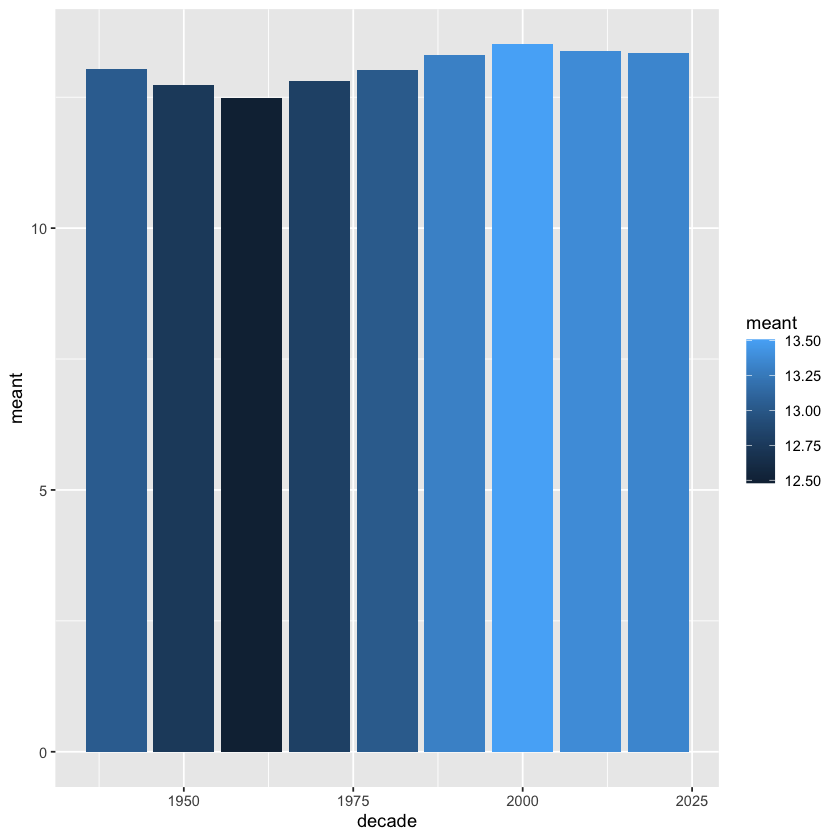

In [20]:
ggplot(DecadeTemp, aes(x=decade, y=meant, fill = meant))+geom_bar(stat='identity')

From here on, I'll use last year's data

In [21]:
dublinairport_dataset <- "./data/mly532.csv"
dfair<-read.csv(dublinairport_dataset,skip=19)
str(dfair)

'data.frame':	939 obs. of  12 variables:
 $ year : int  1941 1941 1942 1942 1942 1942 1942 1942 1942 1942 ...
 $ month: int  11 12 1 2 3 4 5 6 7 8 ...
 $ meant: num  6.9 6.5 4.3 2.9 6.3 8.4 10.4 13.1 14.6 14.9 ...
 $ maxtp: num  14 12.7 11.9 11.6 16.2 16.2 20.9 24.1 22.2 22.3 ...
 $ mintp: num  -3.1 -3.6 -3.1 -4.3 -6.1 0.8 1.8 1.4 7.2 6.7 ...
 $ mnmax: num  9.9 9.1 6.9 5.8 9.4 11.9 14.4 18 18.9 18.4 ...
 $ mnmin: num  3.9 3.9 1.7 0 3.2 4.9 6.3 8.2 10.4 11.4 ...
 $ rain : num  67.2 41.7 91.9 25.8 76.4 ...
 $ gmin : num  -5.7 -7.6 -9.5 -10.7 -8.3 -0.4 -0.7 -0.9 2.4 4.6 ...
 $ wdsp : num  12 12.5 13.1 9 10.7 15.1 12 9.4 13.4 10.8 ...
 $ maxgt: int  NA NA NA NA NA NA NA NA NA NA ...
 $ sun  : num  56.1 46.1 72.8 51.4 73.9 ...


In [1]:
JanTemp = sqldf(
    "select year, meant, '1' month from dfair where month = 1")
head(JanTemp)

ERROR: Error in sqldf("select year, maxtp, '6' month from timedf where month = 'Jun'"): could not find function "sqldf"


In [ ]:
JunTemp = sqldf("select year, meant, '6' month from dfair where month = 6")
head(JunTemp)

,year,meant,month
,<int>,<dbl>,<int>
1,1942,13.1,6
2,1943,13.2,6
3,1944,12.6,6
4,1945,13.4,6
5,1946,12.1,6
6,1947,13.1,6


Line chart - geom_line()

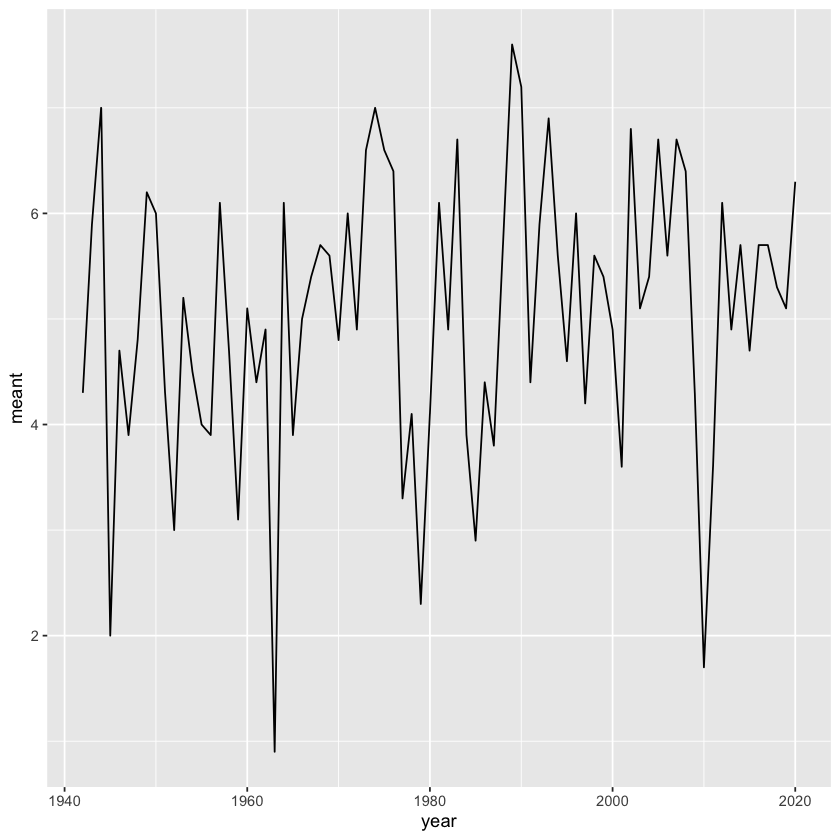

In [ ]:
ggplot(JanTemp, aes(x=year, y=meant))+geom_line()

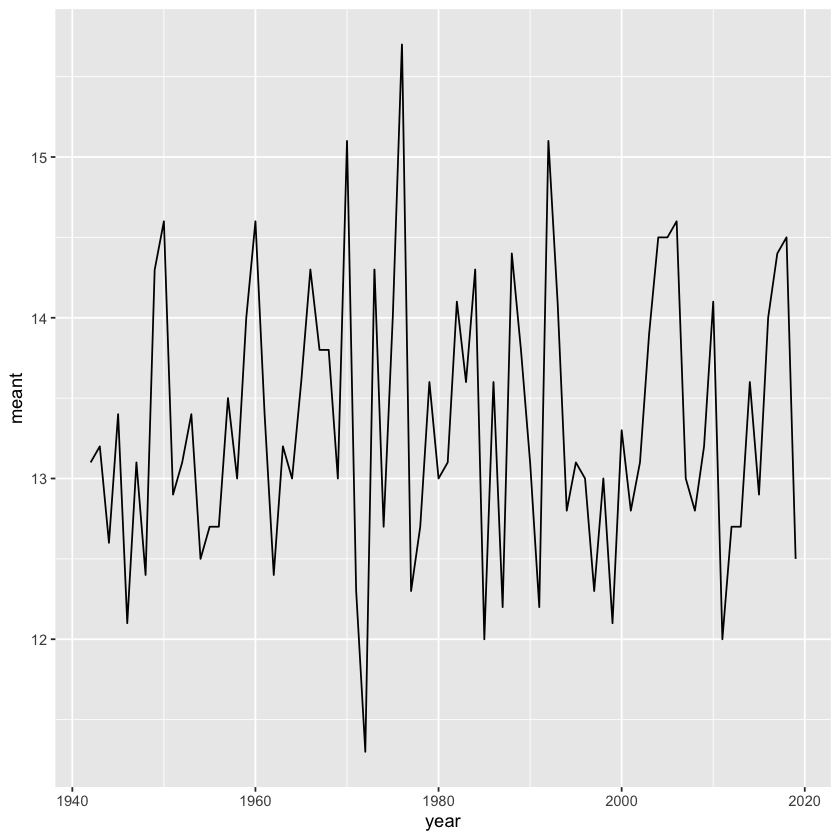

In [ ]:
ggplot(JunTemp, aes(x=year, y=meant))+geom_line()

Combine January and June datasets

In [ ]:
df=sqldf("select * from JanTemp union select * from JunTemp")

In [ ]:
head(df)

,year,meant,month
,<int>,<dbl>,<int>
1,1942,4.3,1
2,1942,13.1,6
3,1943,5.9,1
4,1943,13.2,6
5,1944,7.0,1
6,1944,12.6,6


In [ ]:
str(df)

'data.frame':	157 obs. of  3 variables:
 $ year : int  1942 1942 1943 1943 1944 1944 1945 1945 1946 1946 ...
 $ meant: num  4.3 13.1 5.9 13.2 7 12.6 2 13.4 4.7 12.1 ...
 $ month: int  1 6 1 6 1 6 1 6 1 6 ...


Show 2 plots on the same graph using row-wise small multiples

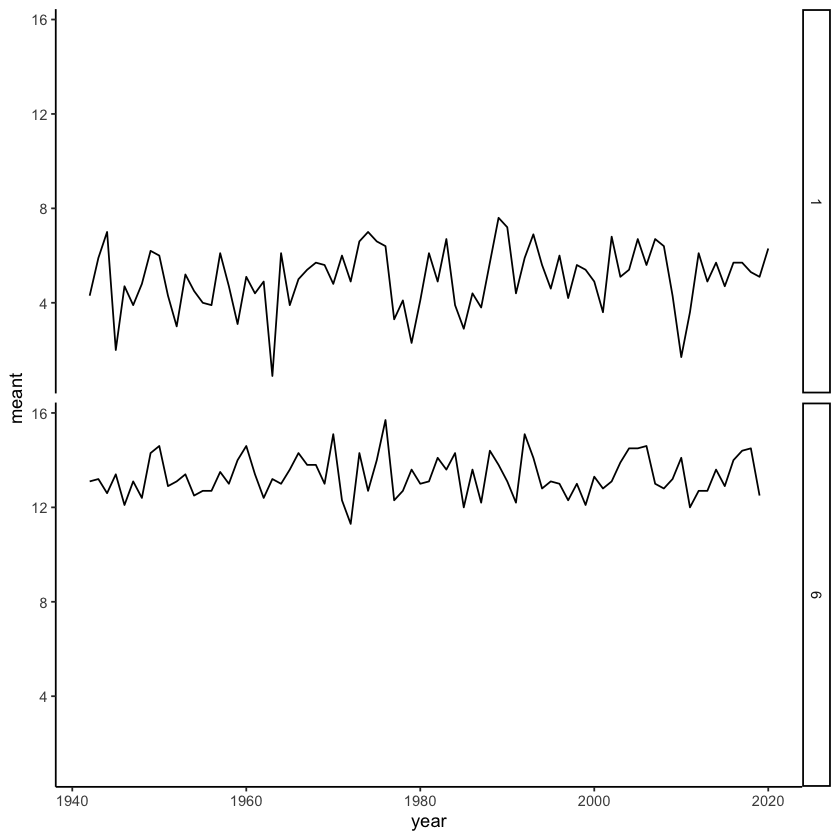

In [ ]:
ggplot(df, aes(x=year, y=meant)) +

    facet_grid(facets = month~.) +
geom_line() +theme_classic()


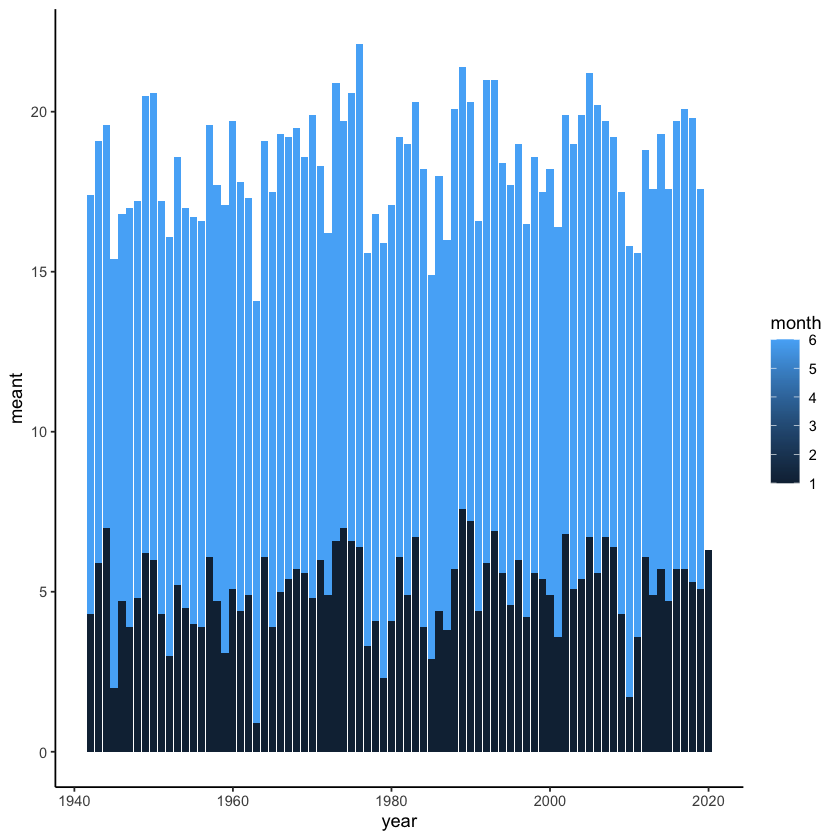

In [ ]:
ggplot(df, aes(x=year, y=meant, fill=month)) +

geom_bar(stat='identity') +theme_classic()


In [ ]:
dfall<-sqldf("select year, meant, month from dfair")

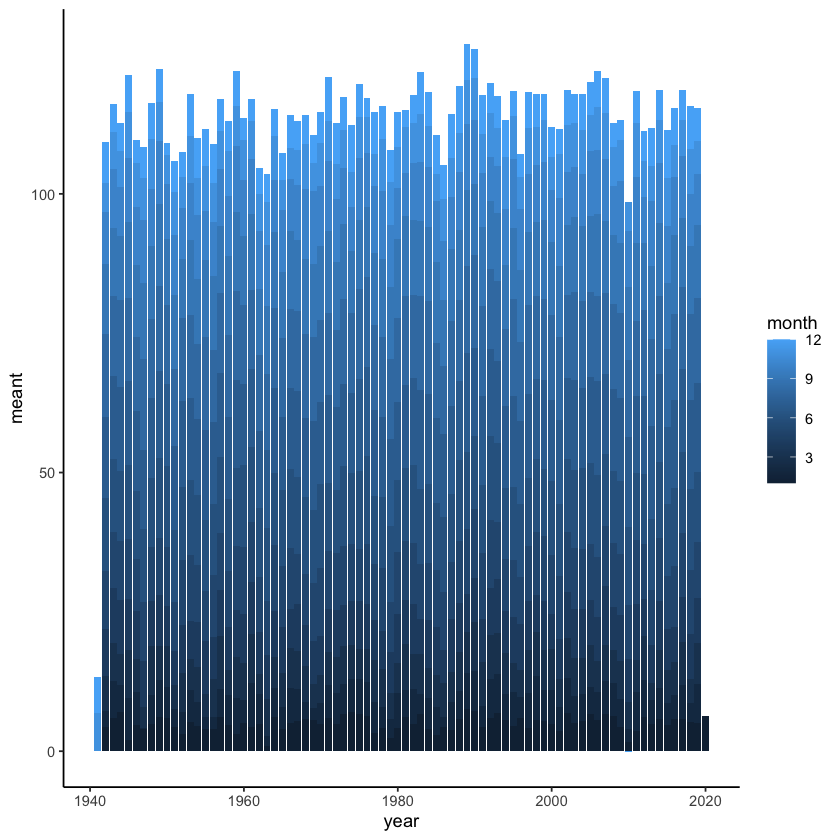

In [ ]:
ggplot(dfall, aes(x=year, y=meant, fill=month)) +

geom_bar(stat='identity') +theme_classic()

In [ ]:
dfall$month=as.factor(dfall$month)
str(dfall)

'data.frame':	939 obs. of  3 variables:
 $ year : int  1941 1941 1942 1942 1942 1942 1942 1942 1942 1942 ...
 $ meant: num  6.9 6.5 4.3 2.9 6.3 8.4 10.4 13.1 14.6 14.9 ...
 $ month: Factor w/ 12 levels "1","2","3","4",..: 11 12 1 2 3 4 5 6 7 8 ...


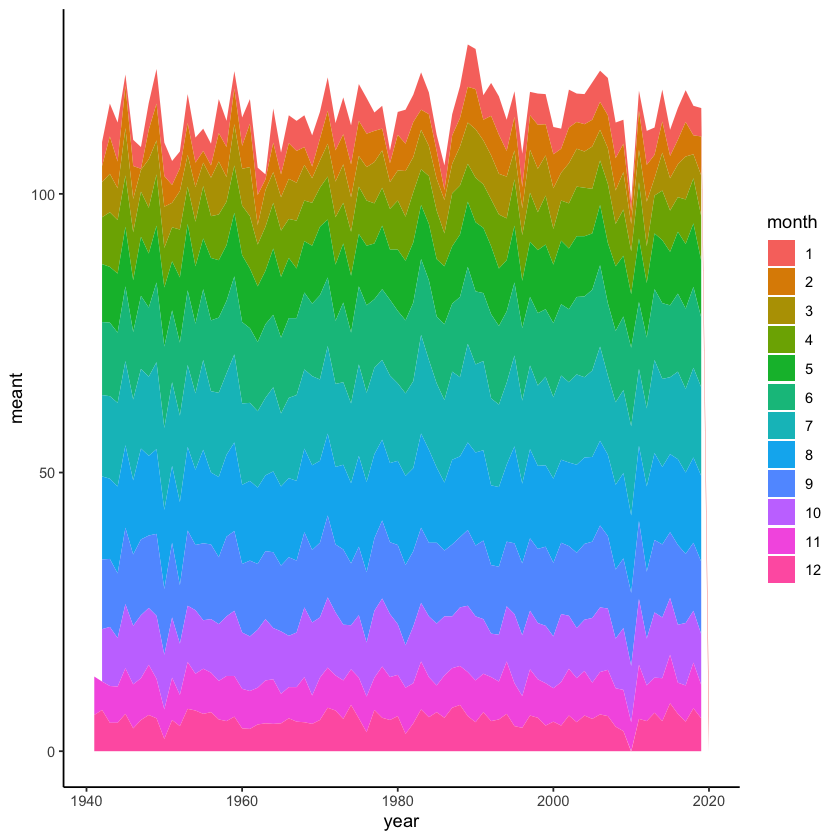

In [ ]:
ggplot(dfall, aes(x=year, y=meant, fill=month)) +

geom_area() +theme_classic()

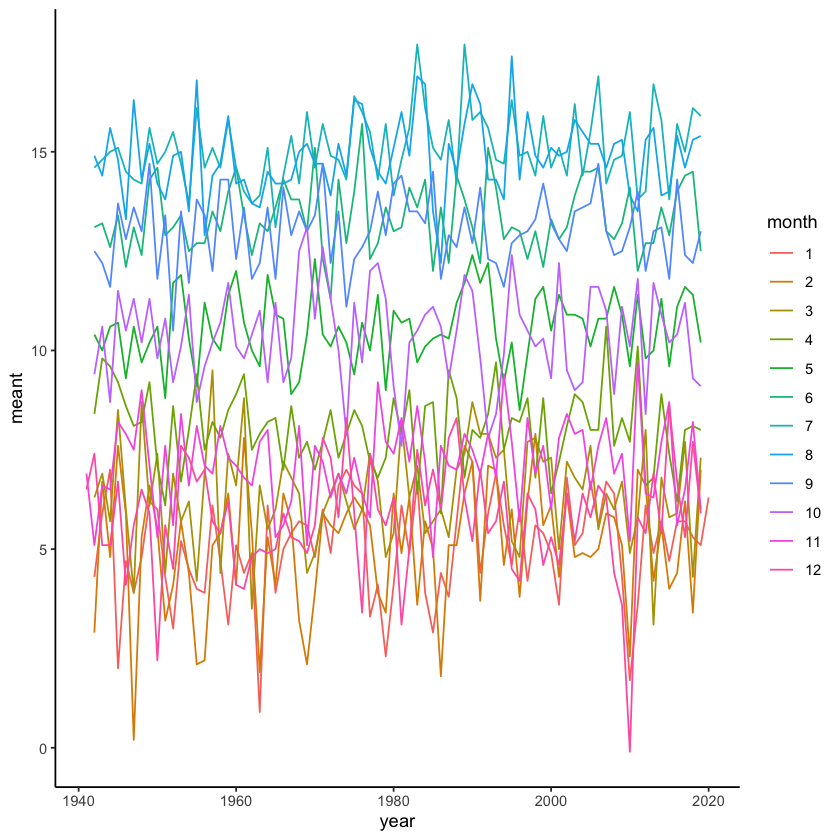

In [ ]:
ggplot(data = dfall, aes(x = year, y = meant, fill = month, colour=month)) + 
    geom_line()+theme_classic()

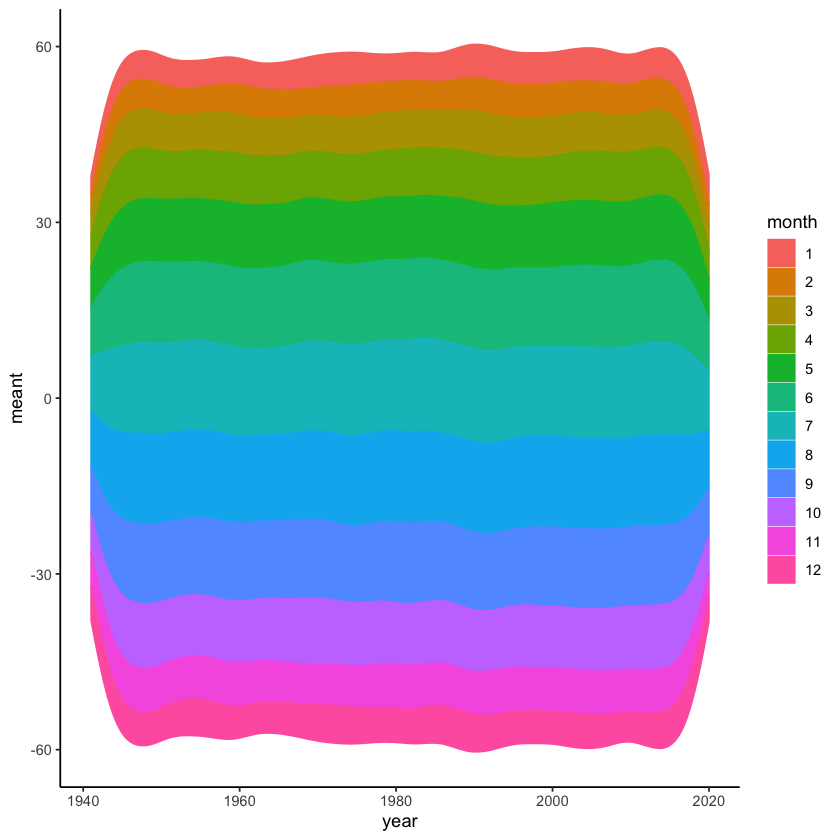

In [ ]:
ggplot(data = dfall, aes(x = year, y = meant, fill = month, colour=month)) + 
    geom_stream()+theme_classic()

Show 2 plots on the same graph using row-wise small multiples

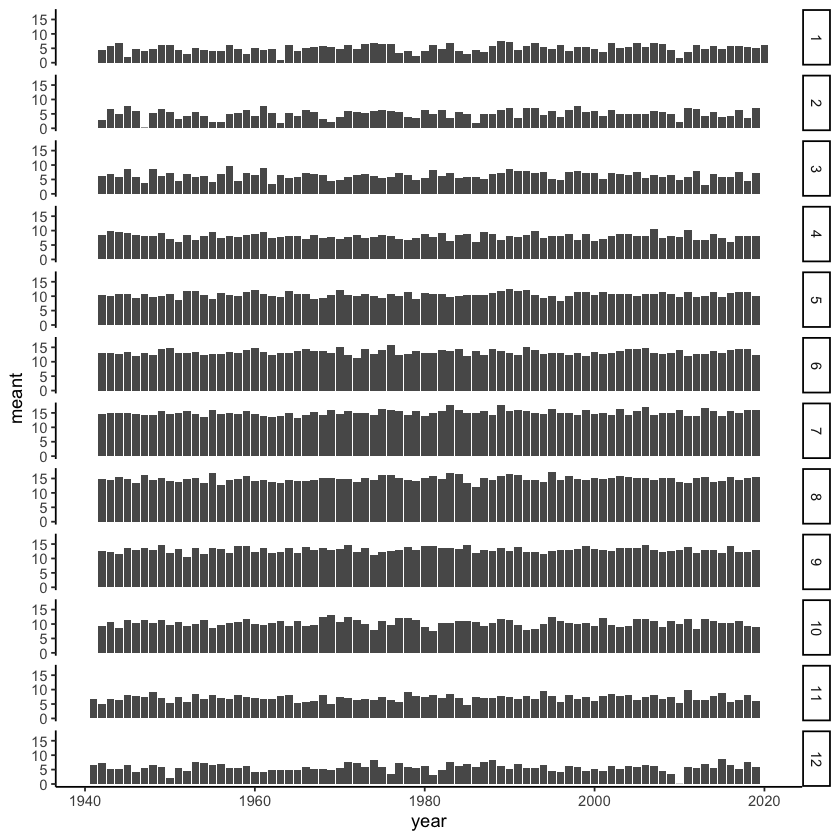

In [ ]:
ggplot(data = dfall, aes(x = year, y = meant)) + 
geom_bar(stat='identity') +
facet_grid(facets = month~.) +
       theme_classic()

Show 2 plots on the same graph using column-wise small multiples

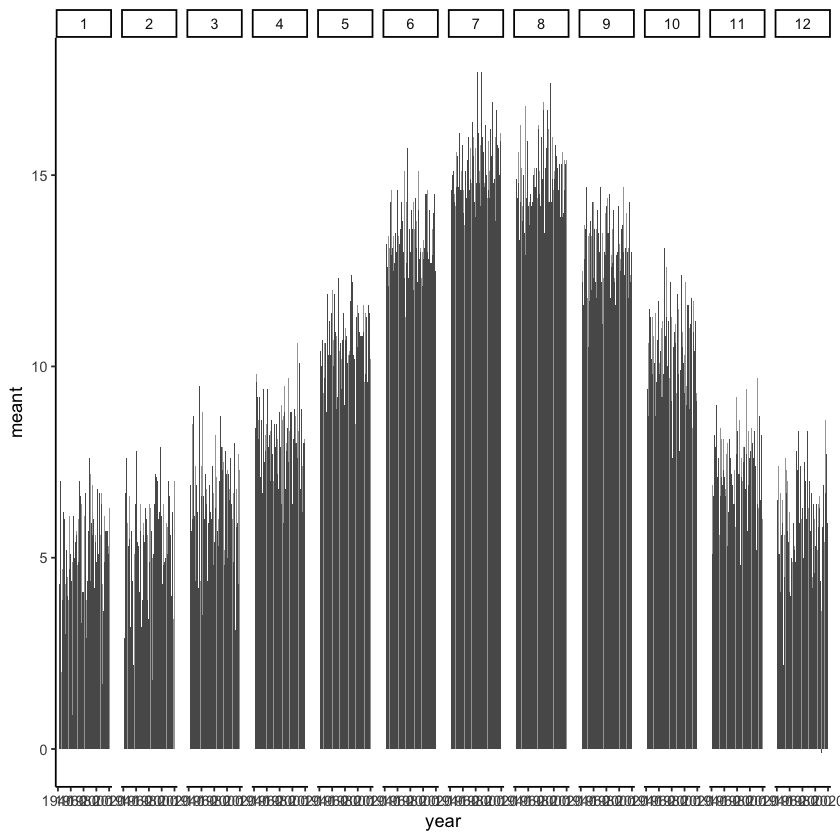

In [ ]:
ggplot(data = dfall, aes(x = year, y = meant)) + 
geom_bar(stat='identity') +
facet_grid(facets = .~month) +
       theme_classic()

Those graphs are truly difficult to read.  Let's go back to ChickWeight

In [ ]:
str(df)

'data.frame':	157 obs. of  3 variables:
 $ year : int  1942 1942 1943 1943 1944 1944 1945 1945 1946 1946 ...
 $ meant: num  4.3 13.1 5.9 13.2 7 12.6 2 13.4 4.7 12.1 ...
 $ month: int  1 6 1 6 1 6 1 6 1 6 ...


In [ ]:
data(ChickWeight)

In [ ]:
df<-ChickWeight
head(df)

,weight,Time,Chick,Diet
,<dbl>,<dbl>,<ord>,<fct>
1,42,0,1,1
2,51,2,1,1
3,59,4,1,1
4,64,6,1,1
5,76,8,1,1
6,93,10,1,1


In [ ]:
df = as.data.frame(ChickWeight)
df['ChickInt']=df['Chick']
str(df)

'data.frame':	578 obs. of  5 variables:
 $ weight  : num  42 51 59 64 76 93 106 125 149 171 ...
 $ Time    : num  0 2 4 6 8 10 12 14 16 18 ...
 $ Chick   : Ord.factor w/ 50 levels "18"<"16"<"15"<..: 15 15 15 15 15 15 15 15 15 15 ...
 $ Diet    : Factor w/ 4 levels "1","2","3","4": 1 1 1 1 1 1 1 1 1 1 ...
 $ ChickInt: Ord.factor w/ 50 levels "18"<"16"<"15"<..: 15 15 15 15 15 15 15 15 15 15 ...
 - attr(*, "formula")=Class 'formula'  language weight ~ Time | Chick
  .. ..- attr(*, ".Environment")=<environment: R_EmptyEnv> 
 - attr(*, "outer")=Class 'formula'  language ~Diet
  .. ..- attr(*, ".Environment")=<environment: R_EmptyEnv> 
 - attr(*, "labels")=List of 2
  ..$ x: chr "Time"
  ..$ y: chr "Body weight"
 - attr(*, "units")=List of 2
  ..$ x: chr "(days)"
  ..$ y: chr "(gm)"


In [ ]:
df$ChickInt=as.numeric(df$ChickInt)
str(df)

'data.frame':	578 obs. of  5 variables:
 $ weight  : num  42 51 59 64 76 93 106 125 149 171 ...
 $ Time    : num  0 2 4 6 8 10 12 14 16 18 ...
 $ Chick   : Ord.factor w/ 50 levels "18"<"16"<"15"<..: 15 15 15 15 15 15 15 15 15 15 ...
 $ Diet    : Factor w/ 4 levels "1","2","3","4": 1 1 1 1 1 1 1 1 1 1 ...
 $ ChickInt: num  15 15 15 15 15 15 15 15 15 15 ...
 - attr(*, "formula")=Class 'formula'  language weight ~ Time | Chick
  .. ..- attr(*, ".Environment")=<environment: R_EmptyEnv> 
 - attr(*, "outer")=Class 'formula'  language ~Diet
  .. ..- attr(*, ".Environment")=<environment: R_EmptyEnv> 
 - attr(*, "labels")=List of 2
  ..$ x: chr "Time"
  ..$ y: chr "Body weight"
 - attr(*, "units")=List of 2
  ..$ x: chr "(days)"
  ..$ y: chr "(gm)"


In [ ]:
dfdiet<-sqldf("select diet, avg(weight) MeanWt, Time from df group by Diet,Time")
head(dfdiet)

,Diet,MeanWt,Time
,<fct>,<dbl>,<dbl>
1,1,41.40000,0
2,1,47.25000,2
3,1,56.47368,4
4,1,66.78947,6
5,1,79.68421,8
6,1,93.05263,10


In [ ]:
df <-sqldf("select Time, Chick, weight from df where ChickInt < 5")
str(df)

'data.frame':	29 obs. of  3 variables:
 $ Time  : num  0 2 4 6 8 10 12 14 16 18 ...
 $ Chick : Ord.factor w/ 50 levels "18"<"16"<"15"<..: 4 4 4 4 4 4 4 4 4 4 ...
 $ weight: num  41 48 53 60 65 67 71 70 71 81 ...


In [ ]:
unique(df$Chick)

[1] 13 15 16 18
50 Levels: 18 < 16 < 15 < 13 < 9 < 20 < 10 < 8 < 17 < 19 < 4 < 6 < 11 < ... < 48

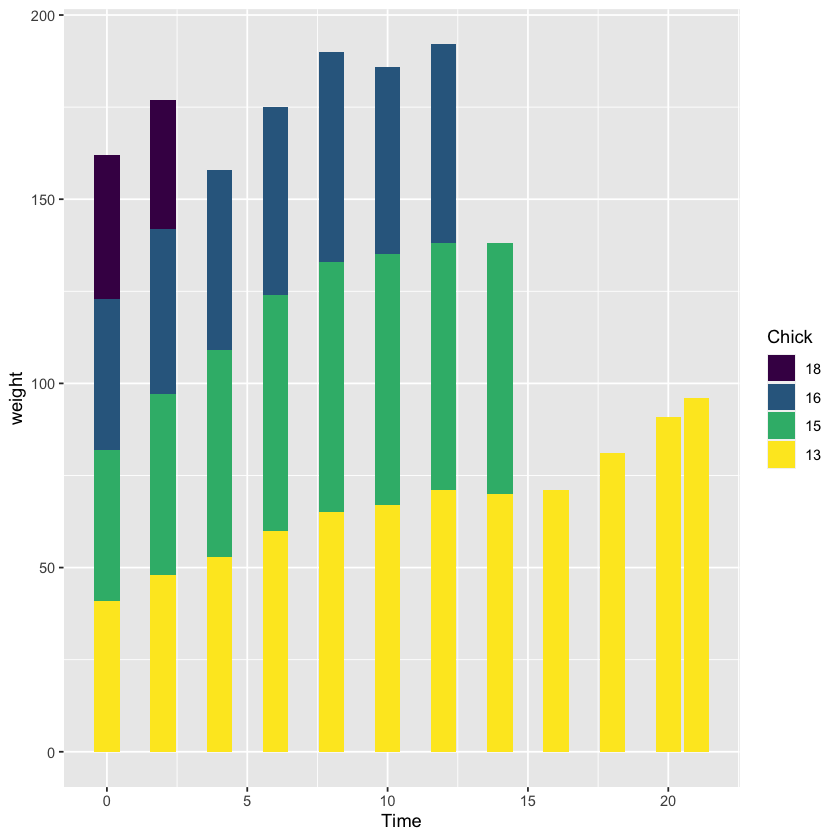

In [ ]:
ggplot(data=df,aes(x=Time,y=weight, fill=Chick)) + geom_bar(stat='identity')

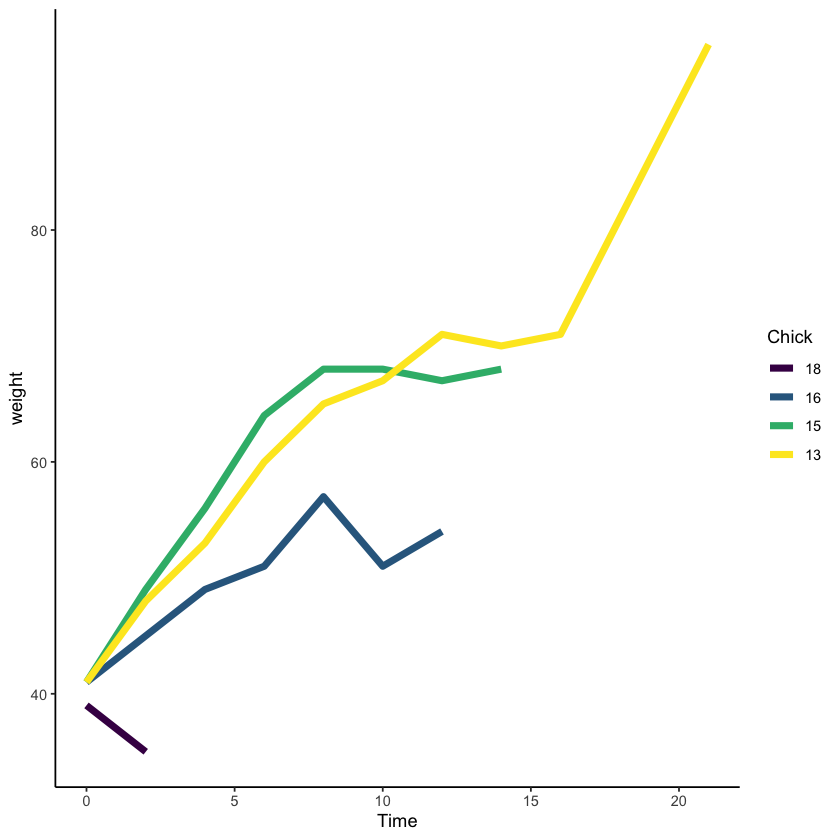

In [ ]:
p = ggplot(data=df,aes(x=Time,y=weight, colour=Chick,fill=Chick)) + 
geom_line(size=2)+theme_classic()
p

In [ ]:
str(dfdiet)

'data.frame':	48 obs. of  3 variables:
 $ Diet  : Factor w/ 4 levels "1","2","3","4": 1 1 1 1 1 1 1 1 1 1 ...
 $ MeanWt: num  41.4 47.2 56.5 66.8 79.7 ...
 $ Time  : num  0 2 4 6 8 10 12 14 16 18 ...


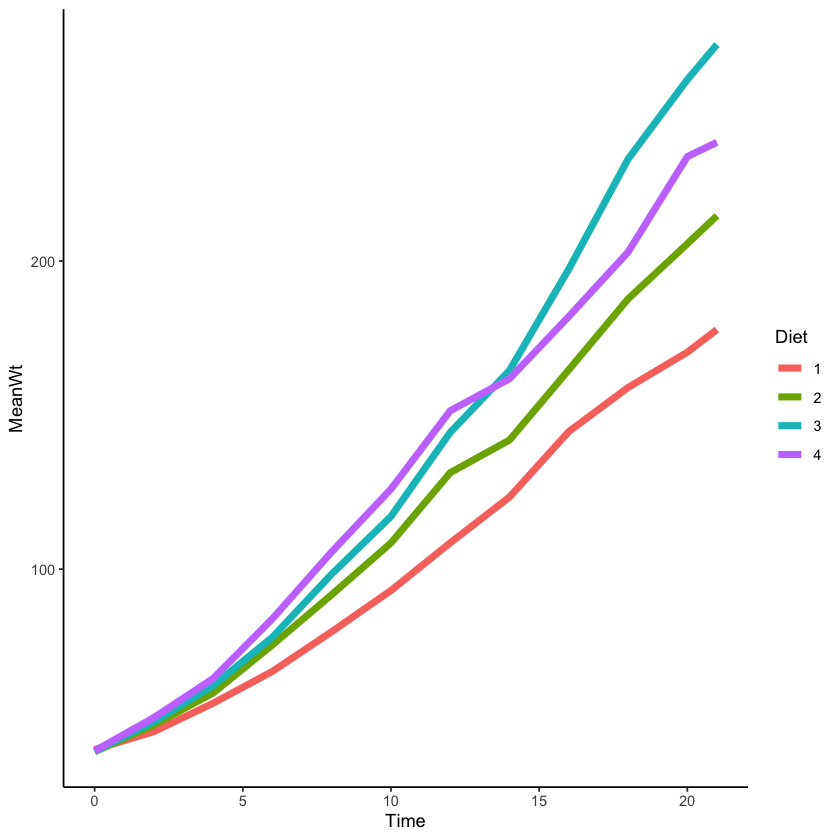

In [ ]:
p2 = ggplot(data=dfdiet,aes(x=Time,y=MeanWt, colour=Diet,fill=Diet)) + 
geom_line(size=2)+theme_classic()
p2

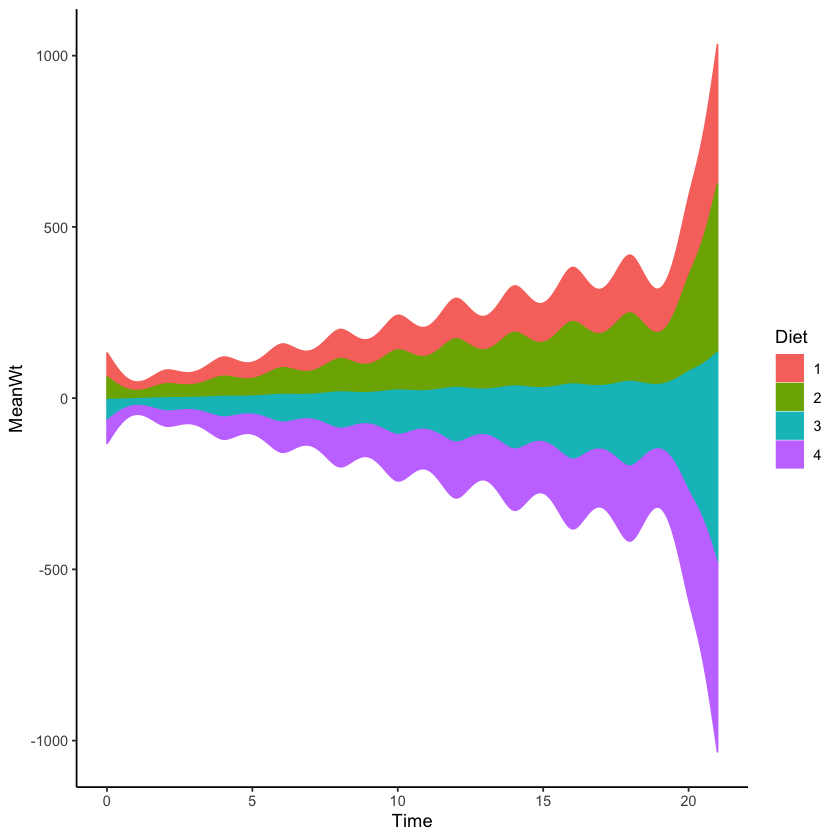

In [ ]:
p3 = ggplot(data=dfdiet,aes(x=Time,y=MeanWt, colour=Diet,fill=Diet)) + 
 geom_stream()+theme_classic()
p3

In [ ]:
df18 <- df[which(df$Chick==18),]
df18

,Time,Chick,weight
,<dbl>,<ord>,<dbl>
28,0,18,39
29,2,18,35


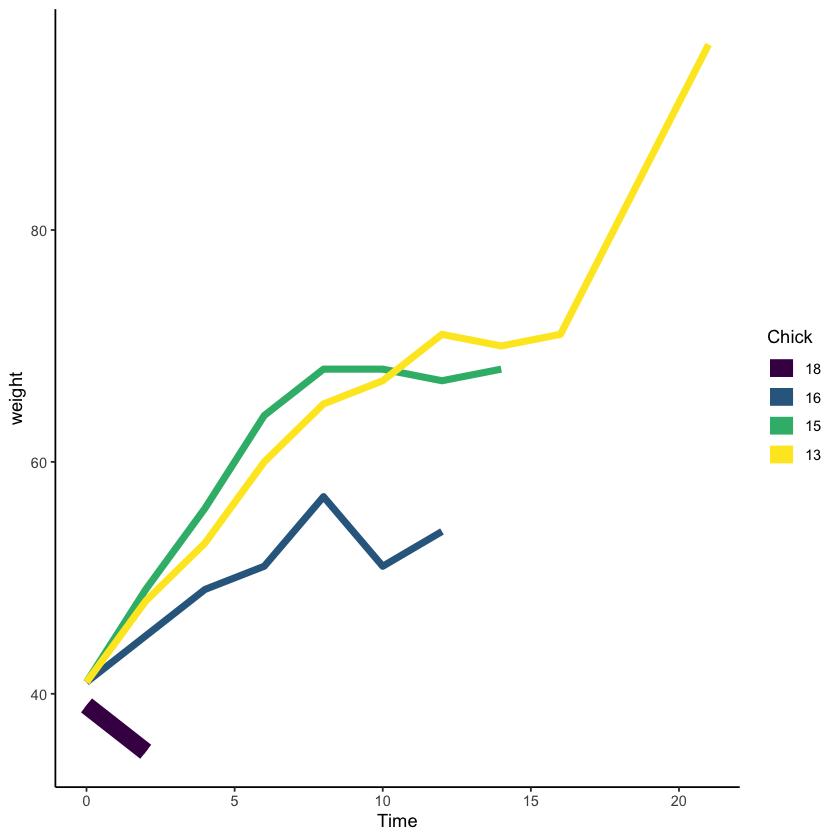

In [ ]:
p + geom_line(data=df18, aes(x = Time, y = weight), size = 5)

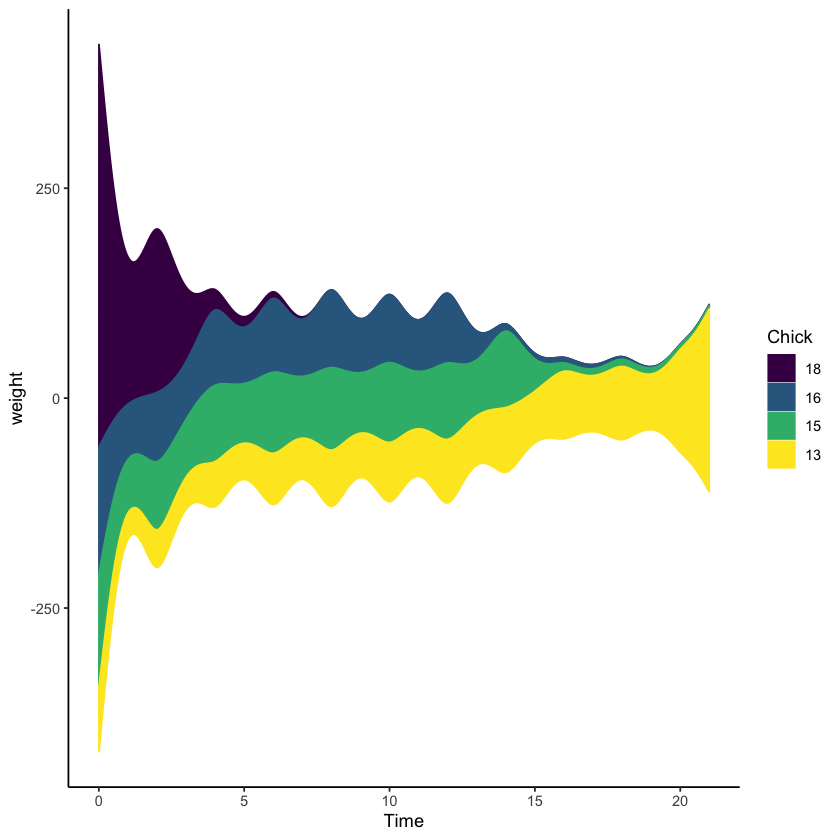

In [ ]:
ggplot(data=df,aes(x=Time,y=weight, colour=Chick,fill=Chick), size = 3) + 
geom_stream()+theme_classic()

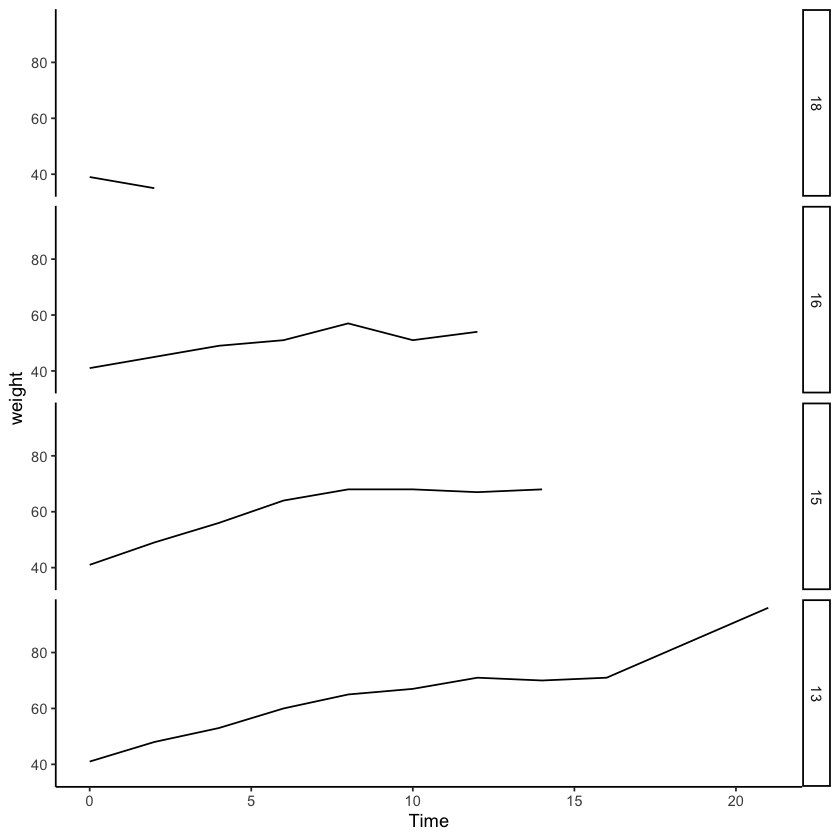

In [ ]:
ggplot(data=df,aes(x=Time,y=weight)) + 
geom_line() +
facet_grid(facet=Chick~.)+
theme_classic()

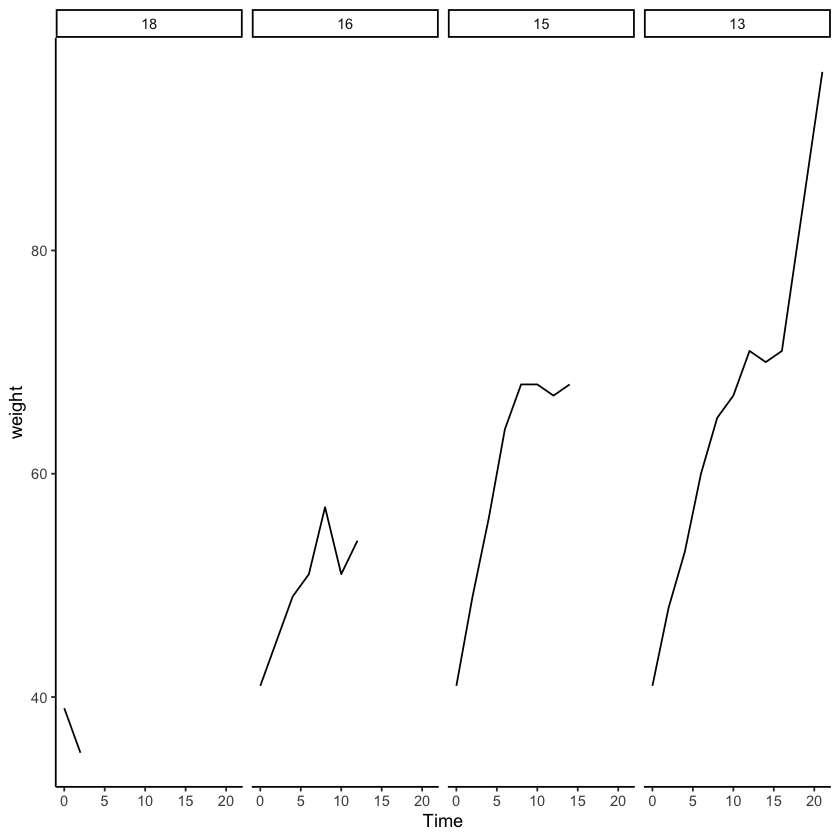

In [ ]:
ggplot(data=df,aes(x=Time,y=weight)) + 
geom_line() +
facet_grid(facet=.~Chick)+
theme_classic()

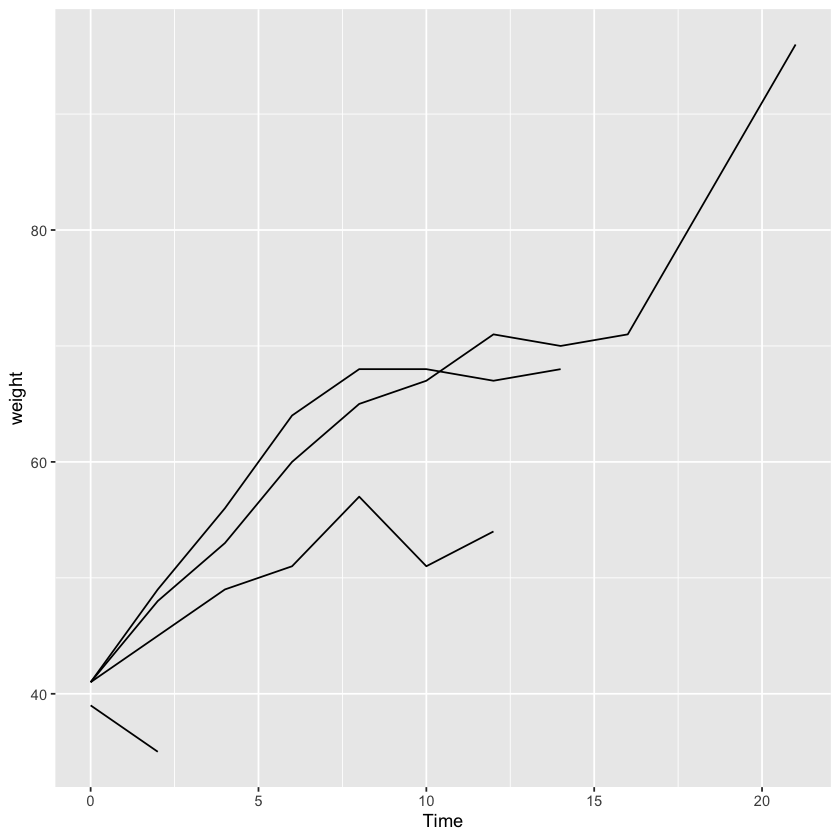

In [ ]:
ggplot(data=df,aes(x=Time,y=weight, fill=Chick)) + geom_line()